In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import pandas as pd
import sklearn
import os
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import random
np.random.seed(34)
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Scikit-learn version: ", sklearn.__version__)

Numpy version:  1.26.4
Pandas version:  2.2.2
Scikit-learn version:  1.4.2


In [30]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21"]
train_data = pd.read_csv("CMAPSSData/train_FD001.txt", sep= "\s+", header = None,names=columns )
train_data. head() 

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [31]:
def add_rul(g):
    g['RUL'] = max(g['cycle']) - g['cycle']
    return g

train = train_data.groupby('id').apply(add_rul)

train.head() 

/tmp/ipykernel_2004114/3102395157.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = train_data.groupby('id').apply(add_rul)


id  cycle     op1     op2    op3  sensor1  sensor2  sensor3  sensor4  \
id                                                                           
1  0   1      1 -0.0007 -0.0004  100.0   518.67   641.82  1589.70  1400.60   
   1   1      2  0.0019 -0.0003  100.0   518.67   642.15  1591.82  1403.14   
   2   1      3 -0.0043  0.0003  100.0   518.67   642.35  1587.99  1404.20   
   3   1      4  0.0007  0.0000  100.0   518.67   642.35  1582.79  1401.87   
   4   1      5 -0.0019 -0.0002  100.0   518.67   642.37  1582.85  1406.22   

      sensor5  ...  sensor13  sensor14  sensor15  sensor16  sensor17  \
id             ...                                                     
1  0    14.62  ...   2388.02   8138.62    8.4195      0.03       392   
   1    14.62  ...   2388.07   8131.49    8.4318      0.03       392   
   2    14.62  ...   2388.03   8133.23    8.4178      0.03       390   
   3    14.62  ...   2388.08   8133.83    8.3682      0.03       392   
   4    14.62  ...   2388.04   8133.80    8.4294      0.03       393   

      sensor18  sensor19  sensor20  sensor21  RUL  
id                                                 
1  0      2388     100.0     39.06   23.4190  191  
   1      2388     100.0     39.00   23.4236  190  
   2      2388     100.0     38.95   23.3442  189  
   3      2388     100.0     38.88   23.3739  188  
   4      2388     100.0     38.90   23.4044  187  

[5 rows x 27 columns]

In [32]:
train_data.head() 

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


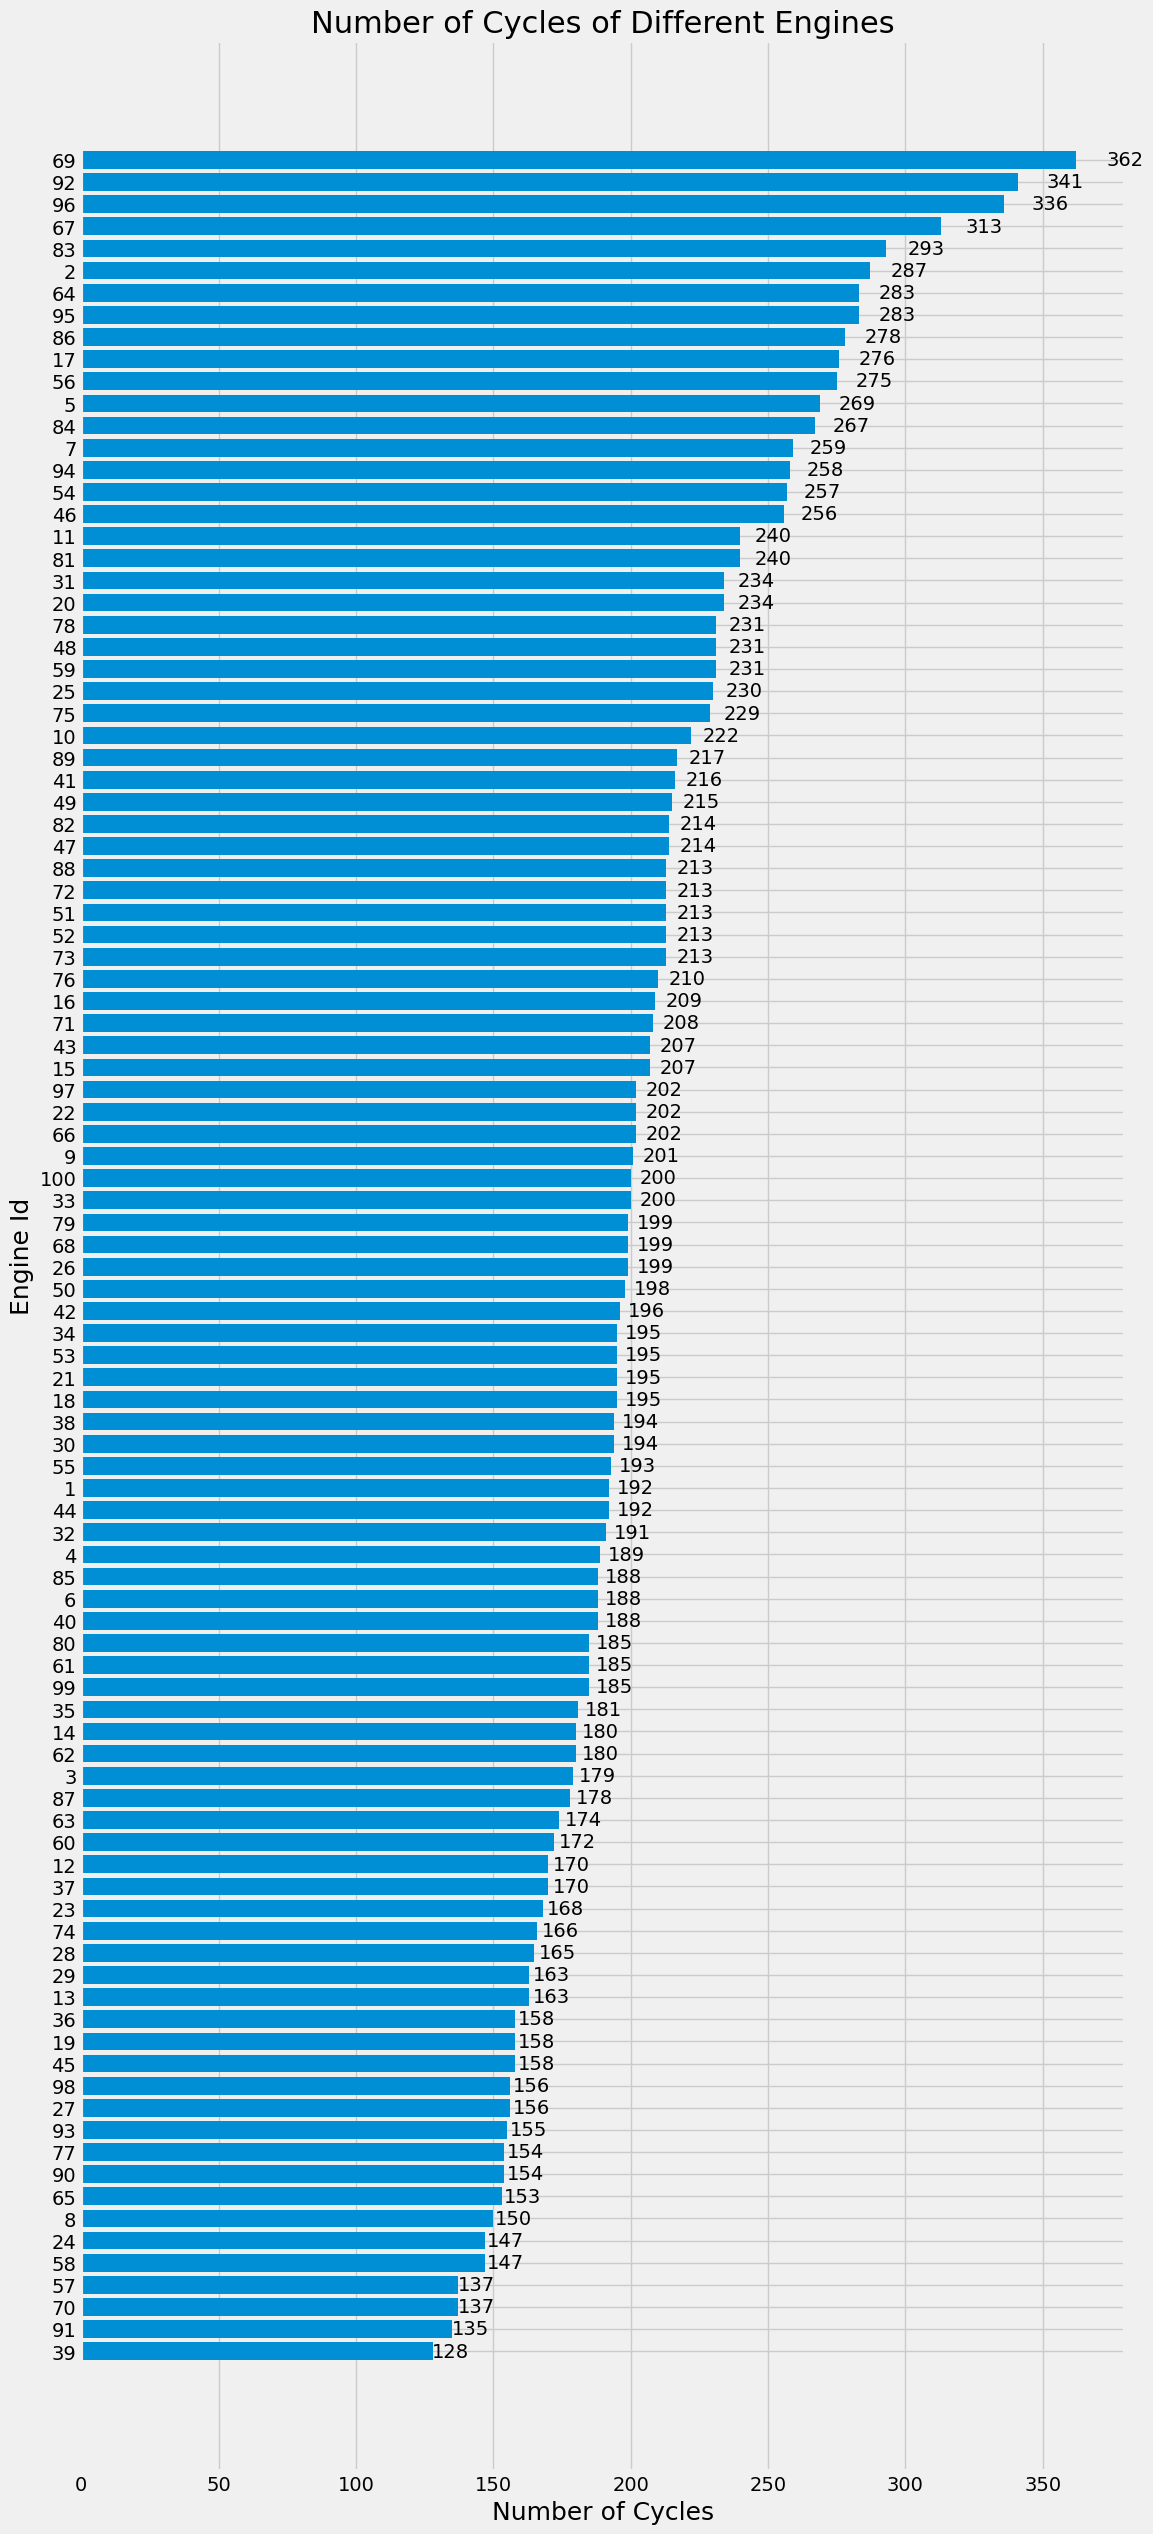

In [33]:
cnt_train=train_data[["id", "cycle"]].groupby("id").max().sort_values(by="cycle", ascending=True)
cnt_ind = [str(i) for i in cnt_train.index.to_list()]
cnt_val = list(cnt_train.cycle.values)

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 30))
rects = ax.barh(cnt_ind, cnt_val)
ax.set_title("Number of Cycles of Different Engines", fontsize=22)
ax.set_ylabel("Engine Id", fontsize=18)
ax.set_xlabel("Number of Cycles", fontsize=18)
ax.grid(True)

for rect in rects:
    width = rect.get_width()
    plt.text(1.05*rect.get_width(), rect.get_y()+0.5*rect.get_height(),
             '%d' % int(width),
             ha='center', va='center')

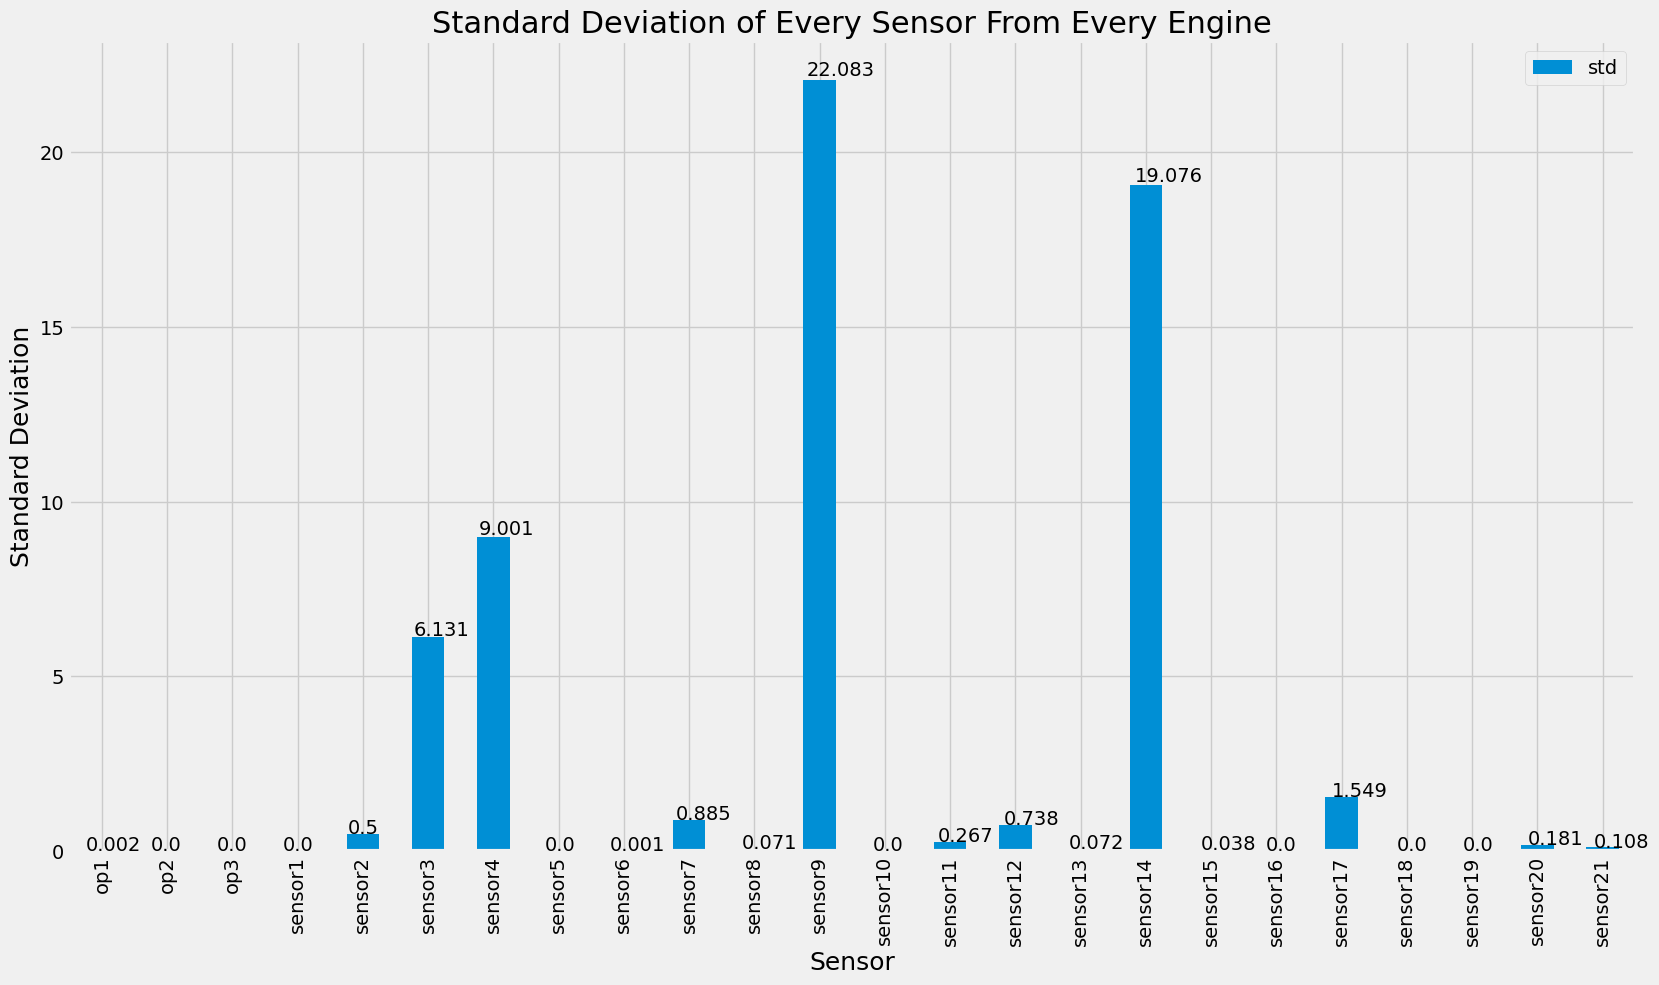

In [34]:
subset_stats = train_data.agg(['mean', 'std']).T[2:]
ax = subset_stats.plot.bar(figsize=(18,10), 
                           y="std")
ax.set_title("Standard Deviation of Every Sensor From Every Engine", fontsize=22)
ax.set_xlabel("Sensor", fontsize=18)
ax.set_ylabel("Standard Deviation", fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [35]:
def process_targets(data_length, early_rul = None):
    """ 
    Takes datalength and earlyrul as input and 
    creates target rul.
    """
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))

def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    """Depending on values of window_length and shift, this function generates batchs of data and targets 
    from input_data and target_data.
    
    Number of batches = np.floor((len(input_data) - window_length)/shift) + 1
    
    **We don't check input dimensions uisng exception handling. So readers should be careful while using these
    functions. If input data are not of desired dimension, either error occurs or something undesirable is 
    produced as output.**
    
    Arguments:
        input_data: input data to function (Must be 2 dimensional)
        target_data: input rul values (Must be 1D array)s
        window_length: window length of data
        shift: Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of 
               29 data points between two consecutive batches.
        
    """
    num_batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
    """ This function takes test data for an engine as first input. The next two inputs
    window_length and shift are same as other functins. 
    
    Finally it takes num_test_windows as the last input. num_test_windows sets how many examplles we
    want from test data (from last). By default it extracts only the last example.
    
    The function return last examples and number of last examples (a scaler) as output. 
    We need the second output later. If we are extracting more than 1 last examples, we have to 
    average their prediction results. The second scaler halps us do just that.
    """
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        return batched_test_data_for_an_engine, num_test_windows

In [36]:
test_data = pd.read_csv("CMAPSSData/test_FD001.txt", sep = "\s+", header = None,names=columns )
true_rul = pd.read_csv("CMAPSSData/RUL_FD001.txt", sep = '\s+', header = None)

from sklearn.preprocessing import MinMaxScaler

In [37]:
columns_to_be_dropped =['id','op1','op2','op3', 'sensor1', 'sensor5', 'sensor6','sensor7','sensor10',
                 'sensor16', 'sensor18', 'sensor19']
#[0,1,2,3,4,5,9,10,11,14,20,21,22,23,24,25]
window_length = 30
shift = 1
early_rul = 125            
processed_train_data = []
processed_train_targets = []

# How many test windows to take for each engine. If set to 1 (this is the default), only last window of test data for 
# each engine is taken. If set to a different number, that many windows from last are taken. 
# Final output is the average output of all windows.
num_test_windows = 5     
processed_test_data = []
num_test_windows_list = []

#columns_to_be_dropped = [0,1,2,3,4,5,9,10,14,20,22,23]

train_data_first_column = train_data['id']
test_data_first_column = test_data['id']

# Scale data for all engines
scaler = MinMaxScaler(feature_range = (-1,1))
train_data = scaler.fit_transform(train_data.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

# Process training and test data sepeartely as number of engines in training and test set may be different.
# As we are doing scaling for full dataset, we are not bothered by different number of engines in training and test set.

# Process trianing data
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values
    
    # Verify if data of given window length can be extracted from training data
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
        
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets, 
                                                                                window_length = window_length, shift = shift)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

# Process test data
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values
    
    # Verify if data of given window length can be extracted from test data
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                             num_test_windows = num_test_windows)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (17731, 30, 14)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 14)
True RUL shape:  (100,)


In [38]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (14184, 30, 14)
Processed validation data shape:  (3547, 30, 14)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


In [39]:
X_train = [x for x in processed_train_data]
X_val = [x for x in processed_val_data]
y_train = [np.array([y]) for y in processed_train_targets]
y_val = [np.array([y]) for y in processed_val_targets]

In [40]:
X_train[0].shape, y_train[0].shape

((30, 14), (1,))

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class ConvLSTMModel(nn.Module):
    def __init__(self, input_channels, window_length, lr=0.001, drop_CNN=0.1, drop_dense=0.1, kernel_size=3):
        super().__init__()
        
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout1 = nn.Dropout(p=drop_CNN)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)
        
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout2 = nn.Dropout(p=drop_CNN)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)
        
        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)
        
        self.dense1 = nn.Linear(128, 512)
        self.dense2 = nn.Linear(512, 128)
        self.dense3 = nn.Linear(128, 1)
        
    def forward(self, x):
        # x shape: (batch_size, window_length, input_channels)
        x = x.permute(0, 2, 1)  # Convert to (batch_size, input_channels, window_length)
        
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool1(x)
        
        x = F.relu(self.conv2(x))
        x = self.dropout2(x)
        x = self.pool2(x)
        
        x = x.permute(0, 2, 1)  # Convert to (batch_size, seq_length, channels)
        
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]  # Get the output of the last time step
        

        x = F.relu(self.dense1(x))
        x = self.dense2(x)
        x = self.dense3(x)
        
        return x


In [42]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import numpy as np

# 定义设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义学习率调度器
def scheduler(epoch, optimizer):
    if epoch < 5:
        lr = 0.001
    else:
        lr = 0.0001
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# 假设预处理后的数据和模型已经定义
input_channels = processed_train_data.shape[2]  # Assuming this is predefined

# 模型实例化并放置到 device 上
model = ConvLSTMModel(input_channels=processed_train_data.shape[2], window_length=window_length).to(device)

# Adam优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # 损失函数

# 将数据转换为 PyTorch 的张量并放置到 device 上
processed_train_data = torch.tensor(processed_train_data, dtype=torch.float32).to(device)
processed_train_targets = torch.tensor(processed_train_targets, dtype=torch.float32).to(device)
processed_val_data = torch.tensor(processed_val_data, dtype=torch.float32).to(device)
processed_val_targets = torch.tensor(processed_val_targets, dtype=torch.float32).to(device)
processed_test_data = torch.tensor(processed_test_data, dtype=torch.float32).to(device)

# 模型训练过程
num_epochs = 10
batch_size = 64

train_dataset = torch.utils.data.TensorDataset(processed_train_data, processed_train_targets)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(processed_val_data, processed_val_targets)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

for epoch in range(num_epochs):

    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)  # 将输入和目标移动到 device
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()  # 模型前向传播
        loss = criterion(outputs, targets)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新权重
        running_loss += loss.item()

    # 打印每个 epoch 的损失
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

    # 验证阶段
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)  # 验证时也要移动到 device
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    print(f'Validation Loss: {val_loss/len(val_loader):.4f}')
    # 调用学习率调度器
    scheduler(epoch, optimizer)
    
    # 预测
    model.eval()
    with torch.no_grad():
        rul_pred = model(processed_test_data).squeeze().cpu().numpy()  # 将输出移动到 CPU 进行后续的 numpy 操作

    # 将预测拆分为每个引擎的结果
    preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])

    # 计算每个引擎的加权平均预测值
    mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights=np.repeat(1/num_windows, num_windows)) 
                                for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]

    # 计算 RMSE
    RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
    print("RMSE:", RMSE)


Epoch [1/10], Loss: 1207.8098
Validation Loss: 328.2464
RMSE: 20.599003692263153
Epoch [2/10], Loss: 284.0428
Validation Loss: 228.4454
RMSE: 16.314722415051754
Epoch [3/10], Loss: 188.1014
Validation Loss: 254.7815
RMSE: 18.862405439713402
Epoch [4/10], Loss: 154.9730
Validation Loss: 191.8293
RMSE: 17.245476155870932
Epoch [5/10], Loss: 139.9057
Validation Loss: 144.0058
RMSE: 15.037313775303833
Epoch [6/10], Loss: 127.3125
Validation Loss: 151.3184
RMSE: 16.92807957970664
Epoch [7/10], Loss: 99.9787
Validation Loss: 114.9900
RMSE: 14.936537693883583
Epoch [8/10], Loss: 95.2100
Validation Loss: 108.9349
RMSE: 14.420683177831792
Epoch [9/10], Loss: 93.3199
Validation Loss: 112.3567
RMSE: 15.277328804274024
Epoch [10/10], Loss: 89.9491
Validation Loss: 112.1815
RMSE: 14.71752776430802
